<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/DataScience_Topics/2FunctionalApi_ImagetoAgeGenderClassifier_Non_LinearNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image to Age,Gender Classifier_Non-LinearNN

In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/DeepLearn-TopicsTheory-lab/FucntionalApi_Non-LinearNN/utkfaceZip.zip")
zip.extractall("/content")
zip.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator  

In [ ]:
folder_path = "/content/utkface_aligned_cropped/UTKFace"

In [ ]:
age=[]
gender=[]
img_path= []
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)  

In [ ]:
len(age)

23708

In [ ]:
df = pd.DataFrame({'age':age, 'gender' : gender, 'img':img_path })

In [ ]:
df.shape , df.head()

((23708, 3),
    age  gender                                    img
 0   49       1  49_1_0_20170104185000777.jpg.chip.jpg
 1   45       0  45_0_1_20170117171145629.jpg.chip.jpg
 2   36       1  36_1_1_20170113012249151.jpg.chip.jpg
 3   24       1  24_1_4_20170116214244943.jpg.chip.jpg
 4   37       0  37_0_2_20170105163305795.jpg.chip.jpg)

In [ ]:
train_df = df.sample(frac=1, random_state=0 ,axis=0).iloc[:20000]
test_df =  df.sample(frac=1 , random_state=0).iloc[20000:]

In [ ]:
train_df.shape , test_df.shape

((20000, 3), (3708, 3))

Applying Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2 ,
                                   shear_range=0.2 ,
                                   zoom_range=0.2,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale =1./255) 

In [ ]:
train_generator =  train_datagen.flow_from_dataframe(train_df,
                                                     directory=folder_path,
                                                     x_col='img',
                                                     y_col=['age' , 'gender'],
                                                     target_size=(200,200),
                                                     class_mode='multi_output'
                                                     )
test_generator=test_datagen.flow_from_dataframe(test_df,
                                                     directory=folder_path,
                                                     x_col='img',
                                                     y_col=['age' , 'gender'],
                                                     target_size=(200,200),
                                                     class_mode='multi_output'
                                                     )



Found 20000 validated image filenames.
Found 3708 validated image filenames.


Pretrained VGG16 uses

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import * 
from keras.models import Model

In [ ]:
vggnet = VGG16(include_top = False ,
               input_shape=(200,200,3)
               )

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vggnet.trainable = False

output = vggnet.layers[-1].output # this is the last layer
flatten = Flatten()(output) # making Flatten which is connected with output

dense1 = Dense(512, activation="relu")(flatten)
dense2 = Dense(512, activation="relu")(flatten)

dense3 = Dense(512, activation="relu")(dense1)
dense4 = Dense(512, activation="relu")(dense2)

output1 = Dense(1,activation="linear" , name ="age")(dense3)
output2 = Dense(1,activation="sigmoid" , name ="gender")(dense4)  # sigmoid because -> 0 or 1-> male  or Female



In [ ]:
model = Model(inputs = vggnet.input , outputs = [output1, output2])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 200, 200, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 200, 200, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

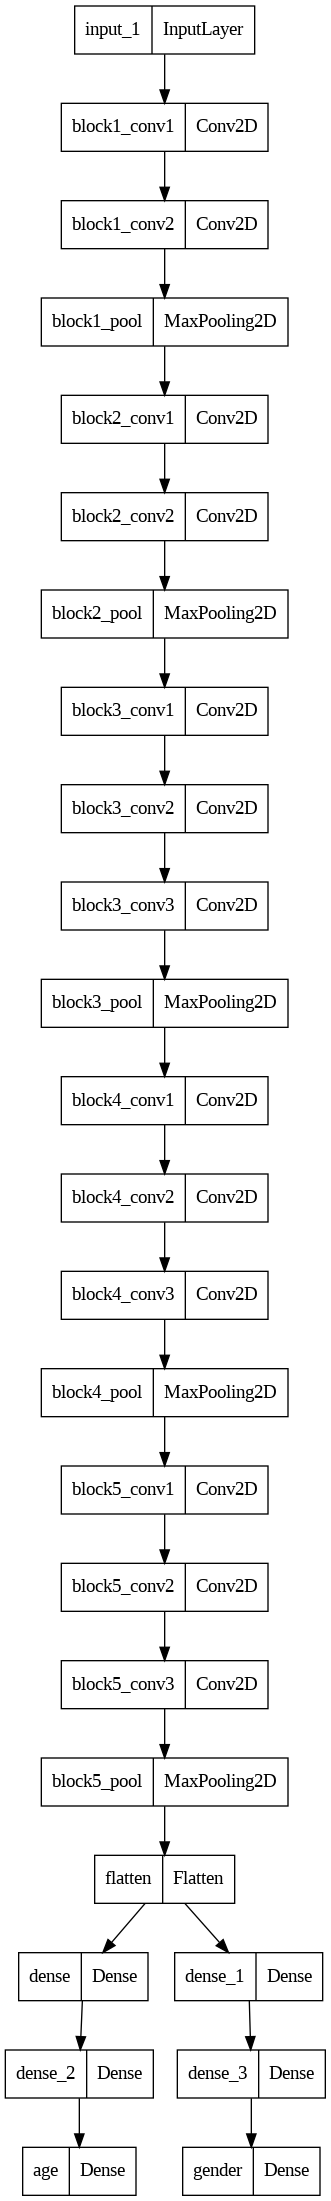

In [ ]:
tf.keras.utils.plot_model(
    model
)

In [ ]:
model.compile(optimizer='adam',
              loss= {'age':'mae' , "gender" :'binary_crossentropy'} , 
              metrics={'age':'mae' , 'gender':'accuracy'},
              loss_weights={'age':1,'gender':99 }
              )
"""
What is Mean Absolute Error (MAE)? In the context of machine learning,
absolute error refers to the magnitude of difference between 
the prediction of an observation and the true value of that observation.
"""

'\nWhat is Mean Absolute Error (MAE)? In the context of machine learning,\nabsolute error refers to the magnitude of difference between \nthe prediction of an observation and the true value of that observation.\n'

In [40]:
history = model.fit(train_generator , batch_size=32 , epochs=5 , validation_data = test_generator)

Epoch 1/5
625/625 [==============================] - 239s 382ms/step - loss: 48.7617 - age_loss: 8.8020 - gender_loss: 0.4036 - age_mae: 8.8020 - gender_accuracy: 0.8121 - val_loss: 41.1982 - val_age_loss: 8.3283 - val_gender_loss: 0.3320 - val_age_mae: 8.3283 - val_gender_accuracy: 0.8463
Epoch 2/5
625/625 [==============================] - 229s 366ms/step - loss: 47.9507 - age_loss: 8.7543 - gender_loss: 0.3959 - age_mae: 8.7543 - gender_accuracy: 0.8162 - val_loss: 53.6522 - val_age_loss: 8.0704 - val_gender_loss: 0.4604 - val_age_mae: 8.0704 - val_gender_accuracy: 0.7864
Epoch 3/5
625/625 [==============================] - 228s 365ms/step - loss: 46.6375 - age_loss: 8.4537 - gender_loss: 0.3857 - age_mae: 8.4537 - gender_accuracy: 0.8194 - val_loss: 40.8861 - val_age_loss: 7.9200 - val_gender_loss: 0.3330 - val_age_mae: 7.9200 - val_gender_accuracy: 0.8449
Epoch 4/5
625/625 [==============================] - 226s 361ms/step - loss: 45.6981 - age_loss: 8.4419 - gender_loss: 0.3763 -

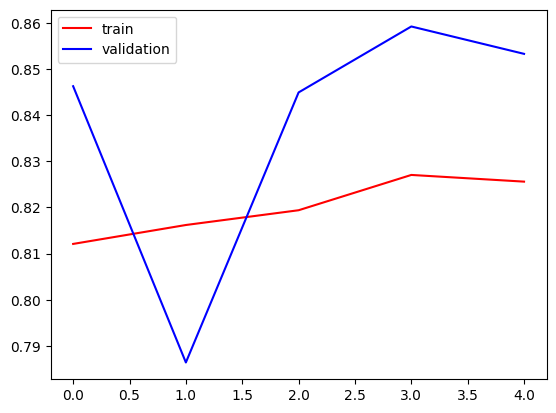

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['gender_accuracy'],color='red',label='train')
plt.plot(history.history['val_gender_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

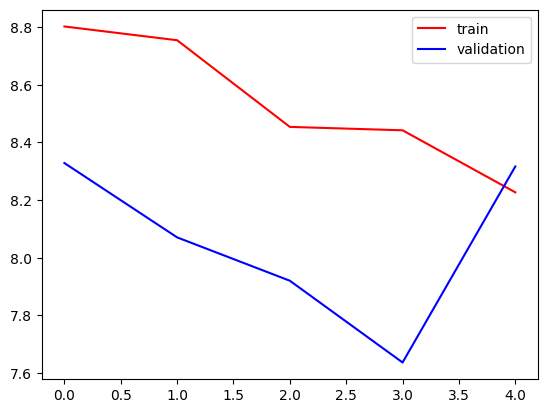

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['age_loss'],color='red',label='train')
plt.plot(history.history['val_age_loss'],color='blue',label='validation')
plt.legend()
plt.show()

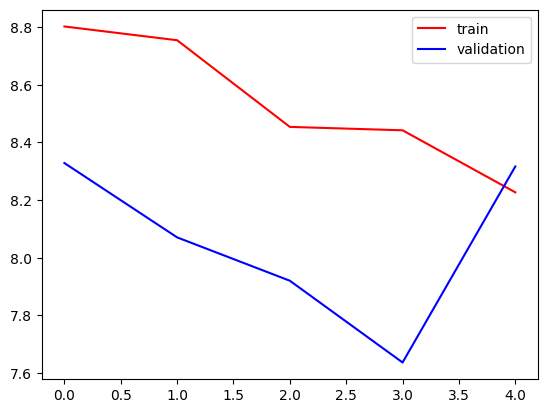

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['age_mae'],color='red',label='train')
plt.plot(history.history['val_age_mae'],color='blue',label='validation')
plt.legend()
plt.show()